In [15]:
# 数据导入
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 设置显示的列数，此处设置为8列；当设置成None，则显示全部的列
# 设置显示行数也是同样的方法
# pd.set_option('display.max_rows',8)
pd.set_option('display.max_columns', None)
# 观察数据可以发现，虽然有些数据看似没有内容，其实是有空格在其中，随意不能被识别为空值
# 所以使用skipinitialspace来跳过逗号分隔符之后的空格
# （Skip spaces after delimiter），才能被显示为NaN
raw = pd.read_csv('creditcard_exp.csv',skipinitialspace=True)
raw.head()

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
0,19,1,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,1600,0.102361,3
1,5,1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,1024,0.051184,2
2,95,0,NaN,NaN,1,36,8.40000,0,0,88.61,7.490000,1296,0.910000,1
3,86,1,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,1681,0.197218,3
4,50,1,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,784,0.062676,2


In [27]:
# 可以看出是有NaN，说明有空数据的
# 也通过describe看出
raw.describe(include='all')
# id的count是100， 但avg_exp是70条

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
count,100.000000,100.000000,70.000000,70.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.700000,983.655429,6.787787,0.240000,32.080000,6.142094,0.270000,0.110000,71.092800,6.646331,1089.800000,-0.504237,1.490000
std,29.011492,0.460566,446.294237,0.476035,0.429235,7.828567,3.325640,0.446196,0.314466,36.973676,3.371692,546.159521,0.466883,1.029808
min,1.000000,0.000000,163.180000,5.094854,0.000000,20.000000,1.500000,0.000000,0.000000,6.310000,1.840000,400.000000,-1.526850,0.000000
25%,25.750000,0.000000,697.155000,6.547003,0.000000,26.000000,3.879787,0.000000,0.000000,40.152500,4.346868,676.000000,-0.824868,1.000000
50%,50.500000,1.000000,884.150000,6.784627,0.000000,31.000000,5.535200,0.000000,0.000000,66.535000,5.971105,961.000000,-0.561270,1.000000
75%,75.250000,1.000000,1229.585000,7.114415,0.000000,37.000000,7.791238,1.000000,0.000000,100.522500,8.352039,1369.000000,-0.220382,2.000000
max,100.000000,1.000000,2430.030000,7.795659,1.000000,55.000000,16.900150,1.000000,1.000000,157.900000,18.427000,3025.000000,0.910000,3.000000


In [11]:
raw.corr()
# 由相关系数可以发现，“Age”和“age2”相关系数很高，几乎是一样的

,id,Acc,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
id,1.000000,-0.159509,-0.010545,0.048744,-0.133415,-0.290667,-0.035984,0.057672,-0.165281,0.079211,0.243287,-0.046488
Acc,-0.159509,1.000000,0.163504,-0.180977,0.592094,0.398137,-0.397534,0.143170,0.618853,-0.190702,-0.251648,0.653815
gender,-0.010545,0.163504,1.000000,0.198636,0.651942,0.396609,-0.047893,0.186500,0.629293,0.186086,0.099265,0.348256
Age,0.048744,-0.180977,0.198636,1.000000,0.119538,0.251117,0.152306,-0.002336,0.106420,0.990755,0.082945,0.002606
Income,-0.133415,0.592094,0.651942,0.119538,1.000000,0.588918,-0.132688,0.247363,0.990375,0.080490,-0.029125,0.706609
Ownrent,-0.290667,0.398137,0.396609,0.251117,0.588918,1.000000,-0.141818,0.081386,0.578177,0.232051,0.019477,0.434600
Selfempl,-0.035984,-0.397534,-0.047893,0.152306,-0.132688,-0.141818,1.000000,0.004178,-0.152281,0.135163,0.154581,-0.230504
dist_home_val,0.057672,0.143170,0.186500,-0.002336,0.247363,0.081386,0.004178,1.000000,0.261563,-0.007408,-0.126949,0.354275
dist_avg_income,-0.165281,0.618853,0.629293,0.106420,0.990375,0.578177,-0.152281,0.261563,1.000000,0.066697,-0.167198,0.723511
age2,0.079211,-0.190702,0.186086,0.990755,0.080490,0.232051,0.135163,-0.007408,0.066697,1.000000,0.091673,-0.023710


In [21]:
# 划分训练集和测试集，本例预测未办卡的人的消费，也就是说
# Acc=0或者avg_exp为空的人，因此只需要从从avg_exp这列开始取值即可
# 训练集
exp = raw[raw['avg_exp'].notnull()].iloc[:, 2:].drop('age2', axis=1).copy()
exp.head()

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class
0,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,0.102361,3
1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,0.051184,2
3,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,0.197218,3
4,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,0.062676,2
5,816.03,6.704451,1,41,10.03015,0,1,119.76,10.332263,-0.302113,3


In [24]:
# 测试集
exp_new = raw[raw['avg_exp'].isnull()].iloc[:,2:].drop('age2', axis=1).copy()
exp_new.head()

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class
2,NaN,NaN,1,36,8.40,0,0,88.61,7.49,0.91,1
11,NaN,NaN,1,22,5.10,0,0,109.07,4.78,0.32,1
13,NaN,NaN,0,27,4.90,0,1,53.93,5.43,-0.53,1
19,NaN,NaN,0,41,4.39,0,1,97.06,4.65,-0.26,1
20,NaN,NaN,1,54,4.18,0,0,10.01,4.59,-0.41,0


In [25]:
exp.describe(include='all')

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,983.655429,6.787787,0.285714,31.157143,7.424706,0.385714,0.028571,74.540857,8.005472,-0.580766,1.928571
std,446.294237,0.476035,0.455016,7.206349,3.077986,0.490278,0.167802,36.949228,3.070744,0.432808,0.873464
min,163.180000,5.094854,0.000000,20.000000,3.493900,0.000000,0.000000,13.130000,3.828842,-1.526850,0.000000
25%,697.155000,6.547003,0.000000,26.000000,5.175662,0.000000,0.000000,49.302500,5.915553,-0.887981,1.000000
50%,884.150000,6.784627,0.000000,30.000000,6.443525,0.000000,0.000000,65.660000,7.084184,-0.612068,2.000000
75%,1229.585000,7.114415,1.000000,36.000000,8.494237,1.000000,0.000000,105.067500,9.123105,-0.302082,3.000000
max,2430.030000,7.795659,1.000000,55.000000,16.900150,1.000000,1.000000,157.900000,18.427000,0.259337,3.000000


In [26]:
raw.describe(include='all')

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
count,100.000000,100.000000,70.000000,70.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.700000,983.655429,6.787787,0.240000,32.080000,6.142094,0.270000,0.110000,71.092800,6.646331,1089.800000,-0.504237,1.490000
std,29.011492,0.460566,446.294237,0.476035,0.429235,7.828567,3.325640,0.446196,0.314466,36.973676,3.371692,546.159521,0.466883,1.029808
min,1.000000,0.000000,163.180000,5.094854,0.000000,20.000000,1.500000,0.000000,0.000000,6.310000,1.840000,400.000000,-1.526850,0.000000
25%,25.750000,0.000000,697.155000,6.547003,0.000000,26.000000,3.879787,0.000000,0.000000,40.152500,4.346868,676.000000,-0.824868,1.000000
50%,50.500000,1.000000,884.150000,6.784627,0.000000,31.000000,5.535200,0.000000,0.000000,66.535000,5.971105,961.000000,-0.561270,1.000000
75%,75.250000,1.000000,1229.585000,7.114415,0.000000,37.000000,7.791238,1.000000,0.000000,100.522500,8.352039,1369.000000,-0.220382,2.000000
max,100.000000,1.000000,2430.030000,7.795659,1.000000,55.000000,16.900150,1.000000,1.000000,157.900000,18.427000,3025.000000,0.910000,3.000000


### 简单线性回归分析

#### 相关性分析

- 散点图

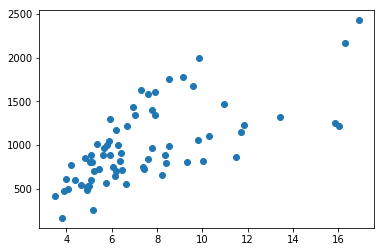

In [30]:
# 暂且认为月平均支出和收入有关系
# exp.plot('Income', 'avg_exp', kind='scatter')  pandas自带方法
plt.scatter(exp['Income'], exp['avg_exp'])
plt.show()

- 相关系数

In [35]:
exp[['Income', 'avg_exp', 'Age', 'dist_home_val']].corr(method='pearson')
# 默认的method也是皮尔森相关系数

,Income,avg_exp,Age,dist_home_val
Income,1.000000,0.674011,0.369129,0.249153
avg_exp,0.674011,1.000000,0.258478,0.319499
Age,0.369129,0.258478,1.000000,0.109323
dist_home_val,0.249153,0.319499,0.109323,1.000000


In [41]:
# 也可以指定和哪个变量比较
exp[['Income', 'avg_exp', 'Age', 'dist_home_val']].corrwith(exp['Income'])

Income           1.000000
avg_exp          0.674011
Age              0.369129
dist_home_val    0.249153
dtype: float64

### OLS

In [44]:
from statsmodels.formula.api import ols

lm_s = ols('avg_exp ~ Income', data=exp).fit()
lm_s.params
# 得到的模型是
# y = 97.7x + 258.0

Intercept    258.049498
Income        97.728578
dtype: float64

- 得到预测值和残差

In [50]:
pd.DataFrame([lm_s.predict(exp), lm_s.resid], index=['predict', 'resid']).T.head()
# 转置矩阵
# lm_s.predict(exp) 预测值
# lm_s.resid 残差

,predict,resid
0,1825.141904,-608.111904
1,1806.803136,-555.303136
3,1379.274813,-522.704813
4,1568.506658,-246.676658
5,1238.281793,-422.251793


In [54]:
exp[['avg_exp']].head()

,avg_exp
0,1217.03
1,1251.50
3,856.57
4,1321.83
5,816.03


In [58]:
# 计算测试集上的预测值
lm_s.predict(exp_new).head()

2     1078.969552
11     756.465245
13     736.919530
19     687.077955
20     666.554953
dtype: float64

### 多元线性回归
- 其实还是使用OLS方法，只是需要变量的筛选

In [63]:
lm_m = ols('avg_exp ~ Income + dist_home_val + dist_avg_income', data=exp).fit()
lm_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     25.95
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           3.34e-11
Time:                        16:35:25   Log-Likelihood:                -498.62
No. Observations:                  70   AIC:                             1005.
Df Residuals:                      66   BIC:                             1014.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.3507    122.525      0.019      0.985    -242.278     246.980
Income           -164.4378     86.487     -1.901      0.062    -337.115       8.239
dist_home_val       1.5396      1.049      1.468      0.147      -0.555       3.634
dist_avg_income   260.7522     87.058      2.995      0.004      86.934     434.570
==============================================================================
Omnibus:                        5.379   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.367
Skew:                           0.642   Prob(JB):                       0.0683
Kurtosis:                       2.563   Cond. No.                         325.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
lm_m.predict(exp_new).head()

2     710.530521
11    578.037286
13    695.520156
19    642.399765
20    527.264307
dtype: float64

In [66]:
lm_m.params

Intercept            2.350664
Income            -164.437844
dist_home_val        1.539601
dist_avg_income    260.752162
dtype: float64

### 多元线性回归的变量筛选

- 向前法

In [90]:
'''forward select'''
def forward_select(data, respone):
    remaining = set(data.columns)
    remaining.remove(respone)
    select = []
    current_score, best_new_score = float('inf'),float('inf')
    
    while remaining:
        aic_with_candidates = []
        for candidates in remaining:
            formula = "{} ~ {}".format(respone, ' + '.join(select + [candidates]))
            aic = ols(formula=formula, data=data).fit().aic
            aic_with_candidates.append((aic, candidates))
        aic_with_candidates.sort(reverse=True)
#       pop默认取出并返回最后一个元素
        best_new_score, best_candidate=aic_with_candidates.pop()
#       选出最小的aic值
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            select.append(best_candidate)
            current_score = best_new_score
            print('aic is {}, continuing!'.format(current_score))
        else:
            print('forward selection over!')
            break
            
    formula = '{} ~ {}'.format(respone, '+'.join(select))
    print('final formula is {}'.format(formula))
    model = ols(formula=formula, data=data).fit()
    return model

In [91]:
data_for_select = exp[['avg_exp', 'Income', 'Age', 'dist_home_val', 
                       'dist_avg_income']]
lm_m = forward_select(data=data_for_select, respone='avg_exp')
print(lm_m.rsquared)

aic is 1007.6801413968115, continuing!
aic is 1005.4969816306302, continuing!
aic is 1005.2487355956046, continuing!
forward selection over!
final formula is avg_exp ~ dist_avg_income+Income+dist_home_val
0.541151292841195
